In [1]:
import requests
import pprint
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from lxml import html


from urllib.request import Request, urlopen
from bs4 import BeautifulSoup

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

In [4]:
api_key = '6z%2FgxKfIKY%2BtuNJeqL7FrGJW7npokOIDe2DGfpNyD89DK1CidbAYqtAC53diBCRZcMBYatusgu6vzTBZlQJKNw%3D%3D'
stdt = 20000101
eddt = 20221231
pages = 128
numOfRows = 50
datas = []

for page in range(1, pages+1) :
    url = f'http://api.forest.go.kr/openapi/service/forestDisasterService/frstFireOpenAPI?serviceKey={api_key}&searchStDt={stdt}&searchEdDt={eddt}&pageNo={page}&numOfRows={numOfRows}'
    result = urlopen(url)
    soup = BeautifulSoup(result, 'lxml-xml')
    text = soup.find_all('item')

    for i in range(len(text)) :
        ocurdt = text[i].ocurdt.string.strip() # 발생 일시
        ocurdo = text[i].ocurdo.string.strip() # 발생 장소(시도)
        ocursgg = text[i].ocursgg.string.strip() # 발생 장소(시군구)
        ocuremd = text[i].ocuremd.string.strip() # 발생 장소(읍면동)
        ocurcause = text[i].ocurcause.string.strip() # 발생 세부 원인
        dmgarea = text[i].dmgarea.string.strip() # 피해 면적
        riskavg = text[i].riskavg.string.strip() # 산불 위험지수(평균)
        riskmax = text[i].riskmax.string.strip() # 산불 위험지수(최대)
        tempavg = text[i].tempavg.string.strip() # 평균 기온(섭씨)
        humidcurr = text[i].humidcurr.string.strip() # 실효 습도
        humidrel = text[i].humidrel.string.strip() # 상대 습도
        humidmin = text[i].humidmin.string.strip() # 최소 습도
        windmax = text[i].windmax.string.strip() # 최대 풍속
        windavg = text[i].windavg.string.strip() # 평균 풍속
        diravg = text[i].diravg.string.strip() # 평균 풍향
        raindays = text[i].raindays.string.strip() # 강우 경과 일수

        data = [ocurdt, ocurdo, ocursgg, ocuremd, ocurcause, dmgarea, riskavg, riskmax, tempavg,
           humidcurr, humidrel, humidmin, windmax, windavg, diravg, raindays]
        datas.append(data)

In [56]:
len(datas)

6362

In [57]:
obj_type_col = ['ocurdt', 'ocurdo', 'ocursgg', 'ocuremd', 'ocurcause','diravg']
float_type_col = ['riskavg', 'riskmax', 'tempavg', 'humidcurr', 'humidrel', 'humidmin','windmax', 'windavg','raindays',  'dmgarea']

In [58]:

df = pd.DataFrame(datas, columns=['ocurdt', 'ocurdo', 'ocursgg', 'ocuremd', 'ocurcause', 'dmgarea',
                                 'riskavg', 'riskmax', 'tempavg', 'humidcurr', 'humidrel', 'humidmin',
                                 'windmax', 'windavg', 'diravg', 'raindays'])

In [59]:
df[float_type_col]

,riskavg,riskmax,tempavg,humidcurr,humidrel,humidmin,windmax,windavg,raindays,dmgarea
0,0.0,0.0,23.6,0.0,57.0,0.0,5.6,1.9,6,0.19
1,0.0,0.0,29.6,0.0,46.0,0.0,4.0,2.4,6,0.08
2,0.0,0.0,29.3,0.0,57.0,0.0,6.7,1.3,2,0.05
3,0.0,0.0,25.3,0.0,46.0,0.0,7.8,3.3,3,0.03
4,0.0,0.0,22.3,0.0,40.0,0.0,9.9,2.0,1,0.01
...,...,...,...,...,...,...,...,...,...,...
6357,0.0,0.0,6.4,0.0,21.0,0.0,0.0,2.6,5,0.2
6358,0.0,0.0,1.6,0.0,34.0,0.0,0.0,3.5,4,0.2
6359,0.0,0.0,0.2,0.0,25.0,0.0,0.0,4.6,15,4.0
6360,0.0,0.0,11.9,0.0,62.0,0.0,0.0,4.0,12,0.2


In [60]:
df[float_type_col] = df[float_type_col].astype(float)

df['target'] = 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362 entries, 0 to 6361
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ocurdt     6362 non-null   object 
 1   ocurdo     6362 non-null   object 
 2   ocursgg    6362 non-null   object 
 3   ocuremd    6362 non-null   object 
 4   ocurcause  6362 non-null   object 
 5   dmgarea    6362 non-null   float64
 6   riskavg    6362 non-null   float64
 7   riskmax    6362 non-null   float64
 8   tempavg    6362 non-null   float64
 9   humidcurr  6362 non-null   float64
 10  humidrel   6362 non-null   float64
 11  humidmin   6362 non-null   float64
 12  windmax    6362 non-null   float64
 13  windavg    6362 non-null   float64
 14  diravg     6362 non-null   object 
 15  raindays   6362 non-null   float64
 16  target     6362 non-null   int64  
dtypes: float64(10), int64(1), object(6)
memory usage: 845.1+ KB






## 시도별 산불 발생 횟수

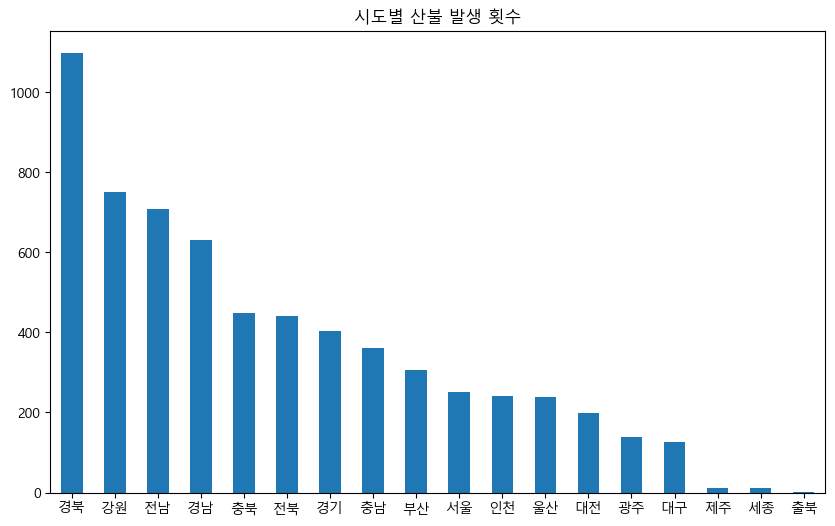

In [61]:
plt.figure(figsize=(10, 6))
do_df = df['ocurdo'].value_counts()
do_df.plot.bar(x='ocurdo')
plt.title('시도별 산불 발생 횟수')
plt.xticks(rotation=0)
plt.show()

## 발생 장소(시도)별 발생 건수 빼기

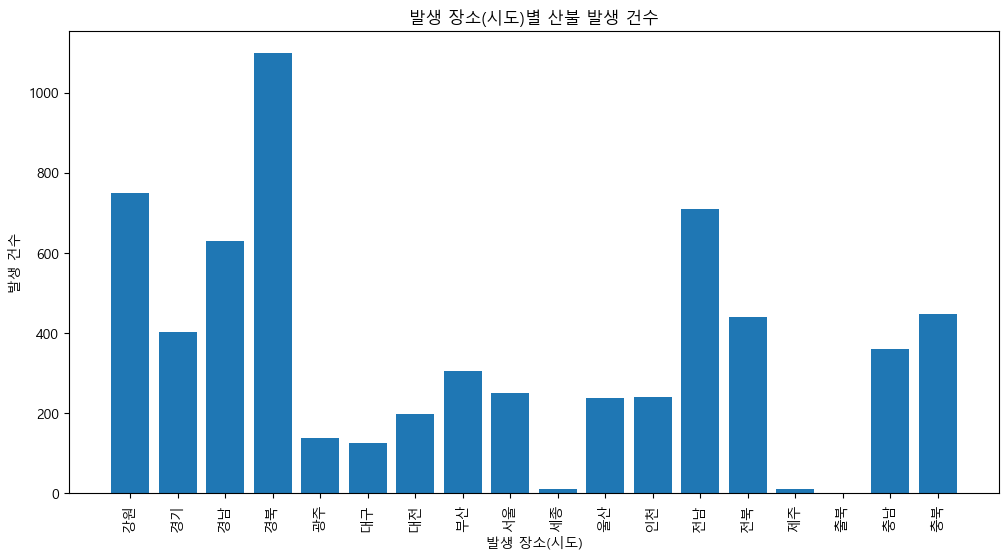

In [62]:
df = pd.DataFrame(datas, columns=['ocurdt', 'ocurdo', 'ocursgg', 'ocuremd', 'ocurcause', 'dmgarea', 'riskavg', 'riskmax', 'tempavg',
           'humidcurr', 'humidrel', 'humidmin', 'windmax', 'windavg', 'diravg', 'raindays'])


count_by_ocurdo = df.groupby('ocurdo')['ocurdt'].count()


plt.figure(figsize=(12,6))
plt.bar(count_by_ocurdo.index, count_by_ocurdo.values)
plt.xticks(rotation=90)
plt.xlabel('발생 장소(시도)')
plt.ylabel('발생 건수')
plt.title('발생 장소(시도)별 산불 발생 건수')
plt.show()

## 발생 장소(시도)별 산불 위험지수(평균)

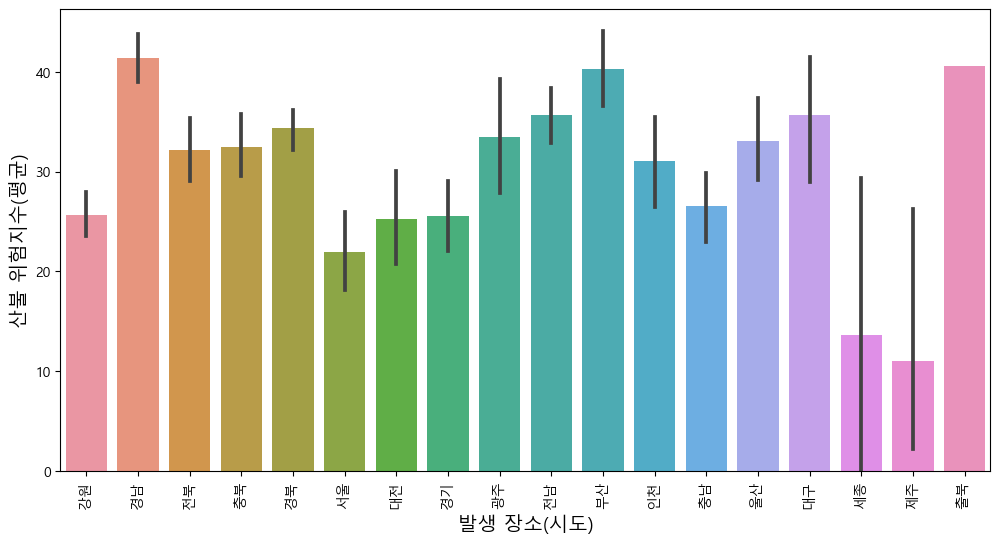

In [63]:
df = pd.DataFrame(datas, columns=['ocurdt', 'ocurdo', 'ocursgg', 'ocuremd', 'ocurcause', 'dmgarea', 'riskavg', 'riskmax', 'tempavg', 'humidcurr', 'humidrel', 'humidmin', 'windmax', 'windavg', 'diravg', 'raindays'])
df = df.astype({'riskavg': float})

plt.figure(figsize=(12, 6))
sns.barplot(x='ocurdo', y='riskavg', data=df)
plt.xlabel('발생 장소(시도)', fontsize=14)
plt.ylabel('산불 위험지수(평균)', fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [64]:
## 전국 시도별 실효습드에 따른 산불 위험지수(평균) , 표가 많아 아래 humiducurr(실효습도) 짤린듯 마지막 제주와 충북에 표시되어있음(참고)

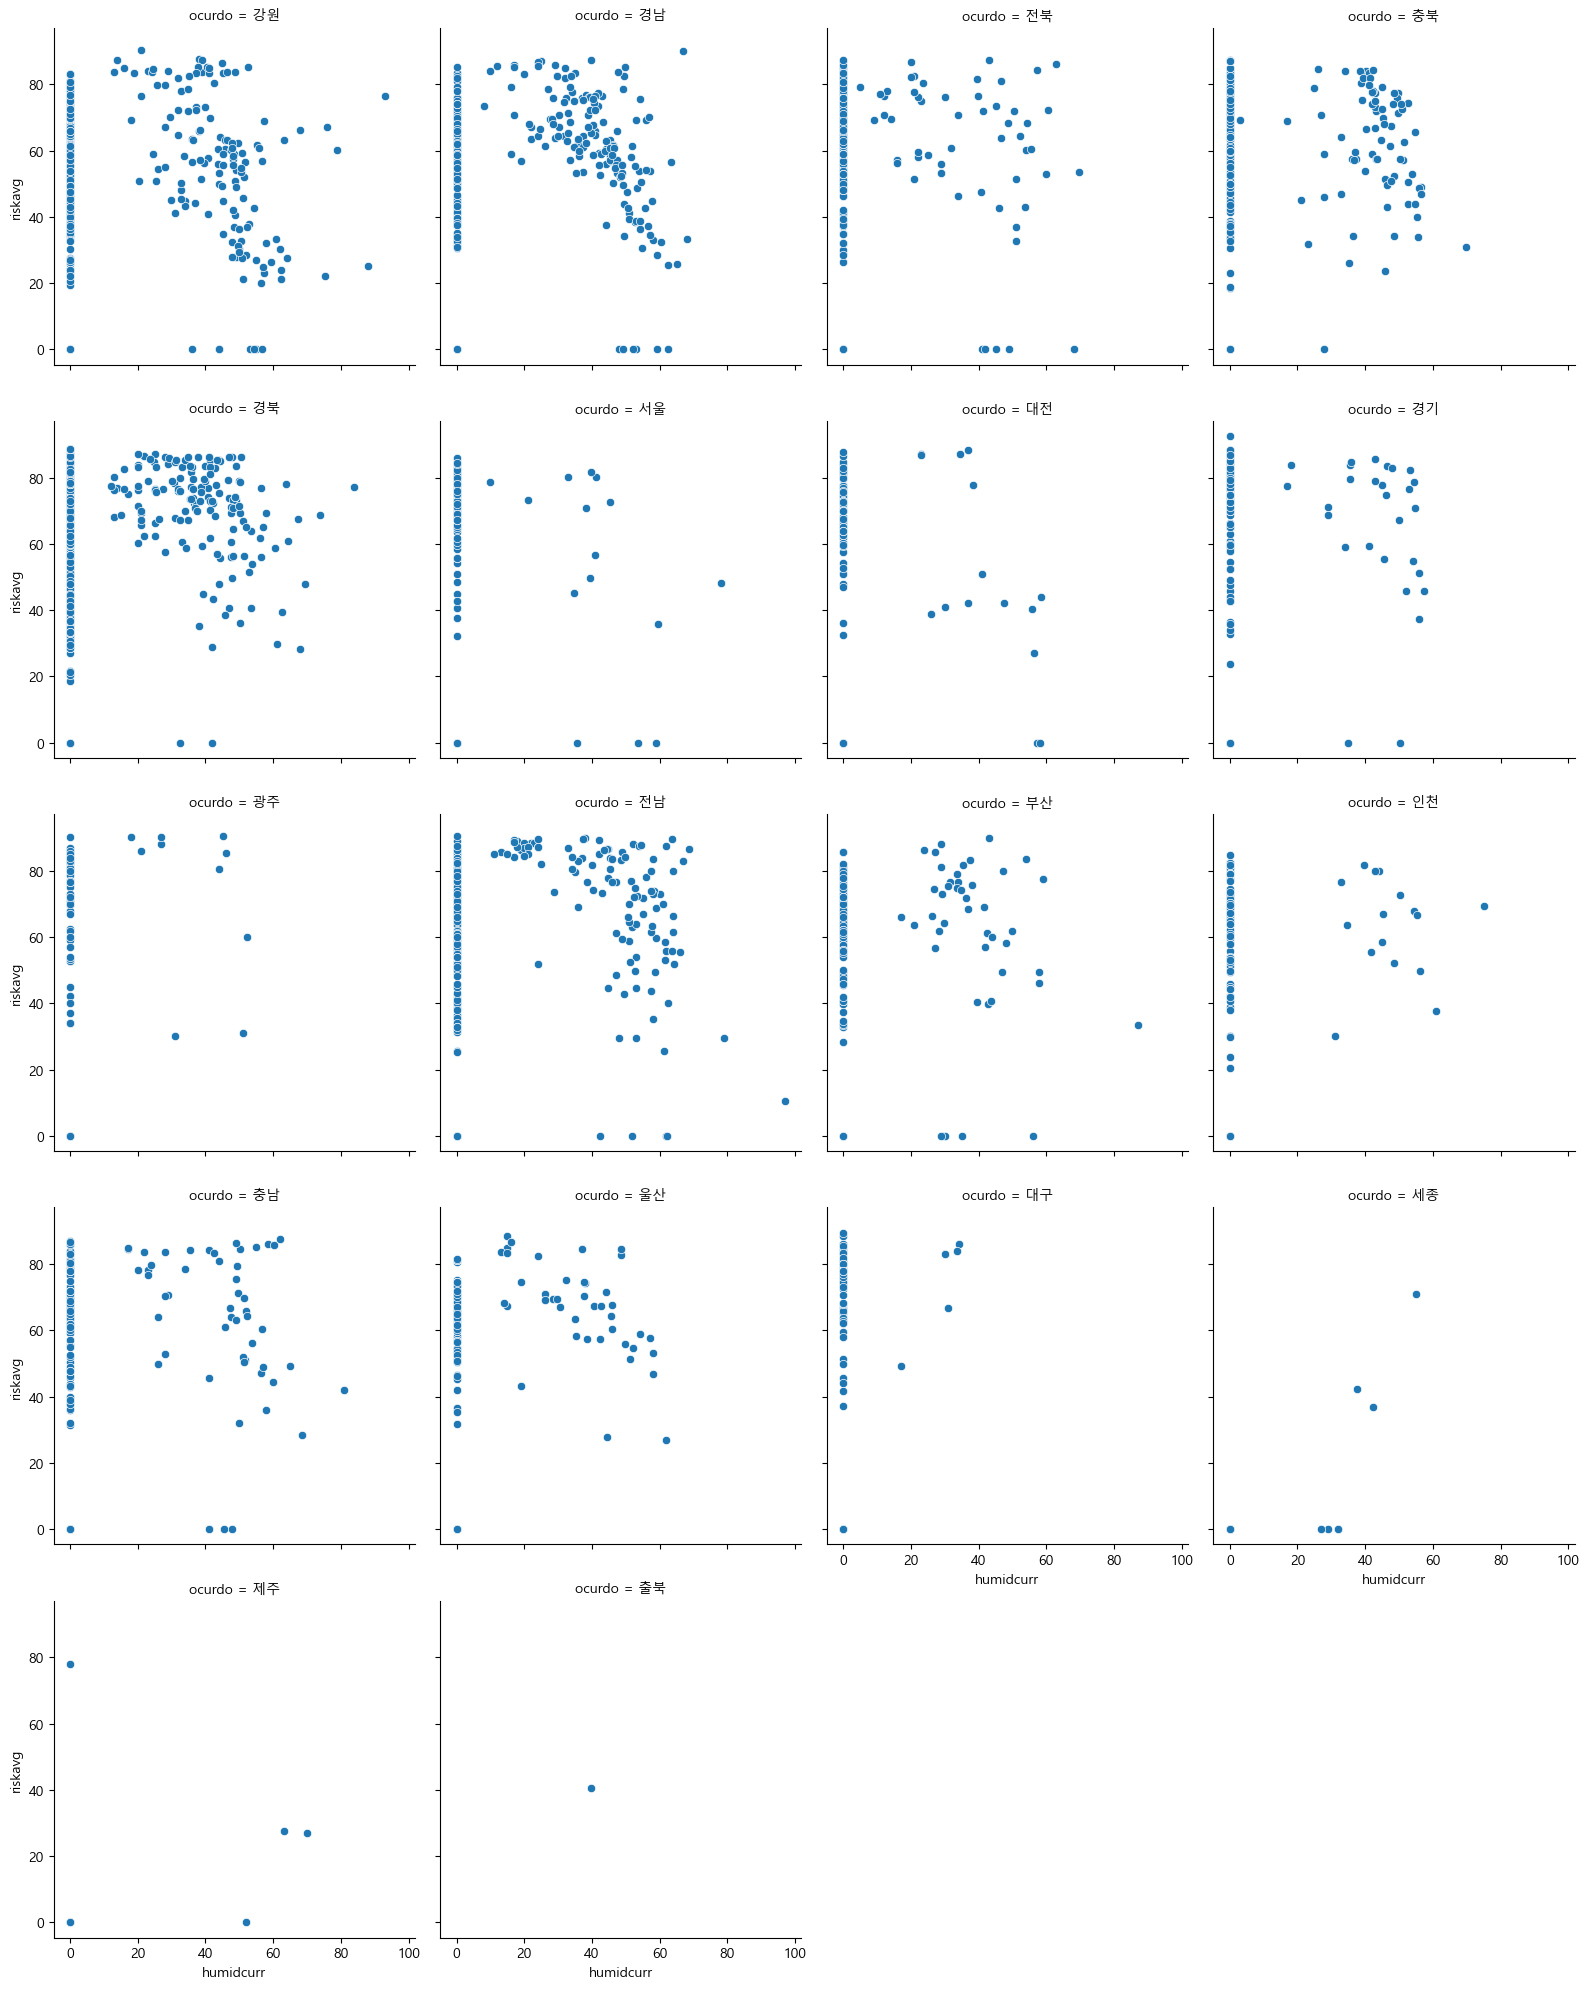

In [65]:
df = pd.DataFrame(datas, columns=['ocurdt', 'ocurdo', 'ocursgg', 'ocuremd', 'ocurcause',
                                  'dmgarea', 'riskavg', 'riskmax', 'tempavg',
                                  'humidcurr', 'humidrel', 'humidmin', 'windmax',
                                  'windavg', 'diravg', 'raindays'])


df['humidcurr'] = pd.to_numeric(df['humidcurr'])
df['riskavg'] = pd.to_numeric(df['riskavg'])


g = sns.FacetGrid(df, col='ocurdo', col_wrap=4, height=4)
g.map(sns.scatterplot, 'humidcurr', 'riskavg')


plt.show()


## 전국 시도별 산불 피해면적(ha)

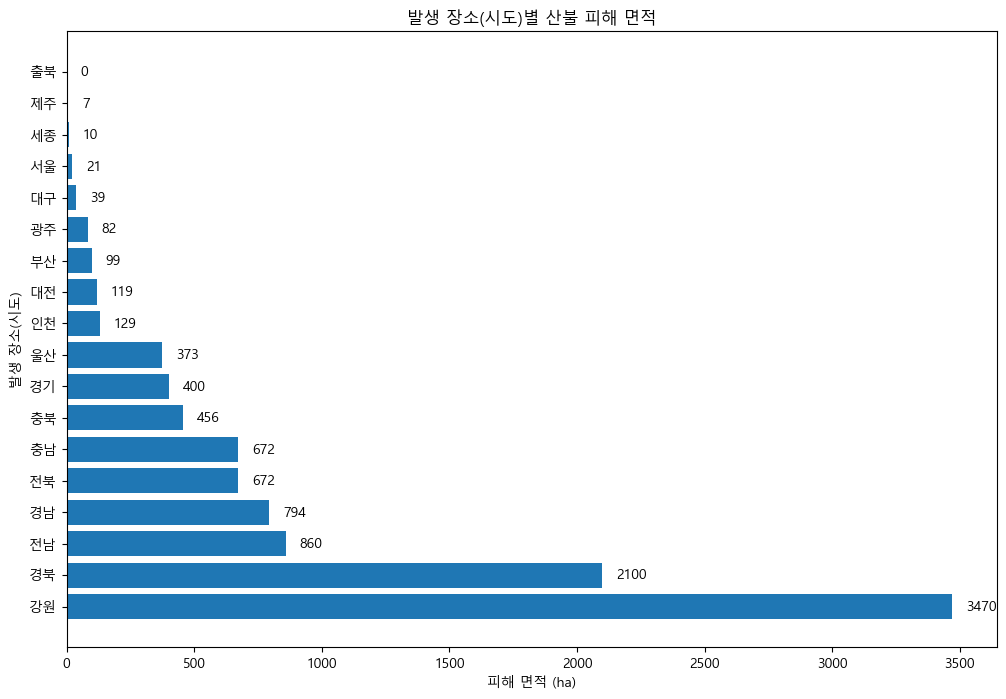

In [66]:
df = pd.DataFrame(datas, columns=['occur_dt', 'occur_do', 'occur_sgg', 'occur_emd', 'occur_cause', 'damage_area', 'risk_avg', 'risk_max', 'temp_avg', 'humid_curr', 'humid_rel', 'humid_min', 'wind_max', 'wind_avg', 'dir_avg', 'rain_days'])

df['damage_area'] = df['damage_area'].astype(float)

grouped = df.groupby('occur_do')['damage_area'].sum().sort_values(ascending=False)


fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(grouped.index, grouped.values)

ax.set_xlabel('피해 면적 (ha)')
ax.set_ylabel('발생 장소(시도)')
ax.set_title('발생 장소(시도)별 산불 피해 면적')

for i, (province, damage_area) in enumerate(zip(grouped.index, grouped.values)):
    plt.annotate(f"{float(damage_area):.0f}", (damage_area, province), textcoords="offset points", xytext=(10,0), ha='left', va='center')
    
plt.show()

## 평균기온과 상대습도의 관계

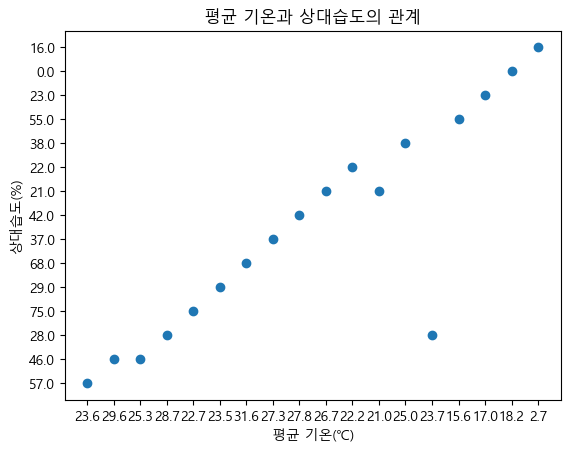

In [67]:
df = pd.DataFrame(datas, columns=['ocurdt', 'ocurdo', 'ocursgg', 'ocuremd', 'ocurcause', 'dmgarea', 'riskavg', 'riskmax', 'tempavg',
           'humidcurr', 'humidrel', 'humidmin', 'windmax', 'windavg', 'diravg', 'raindays'])

df_temp_humid = df[['ocurdo', 'tempavg', 'humidrel']].drop_duplicates(['ocurdo'], keep='first')

plt.scatter(df_temp_humid['tempavg'], df_temp_humid['humidrel'])
plt.xlabel('평균 기온(℃)')
plt.ylabel('상대습도(%)')
plt.title('평균 기온과 상대습도의 관계')
plt.show()


In [68]:
!pip install folium

## 지역별 평균기온과 상대습도 

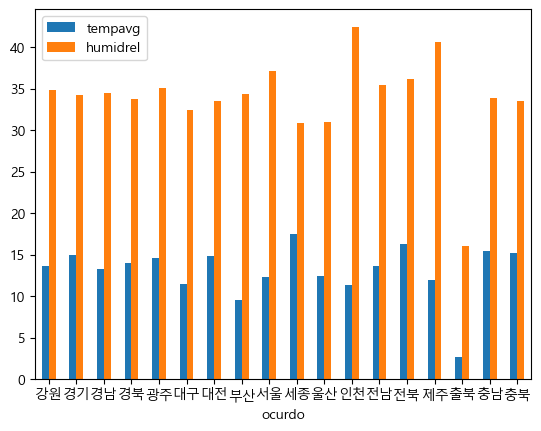

In [69]:
df = pd.DataFrame(datas, columns=['ocurdt', 'ocurdo', 'ocursgg', 'ocuremd', 'ocurcause', 'dmgarea', 'riskavg', 'riskmax', 'tempavg', 'humidcurr', 'humidrel', 'humidmin', 'windmax', 'windavg', 'diravg', 'raindays'])

df['tempavg'] = df['tempavg'].astype(float)
df['humidrel'] = df['humidrel'].astype(float)

grouped = df.groupby('ocurdo')[['tempavg', 'humidrel']].mean()
grouped.plot(kind='bar', rot=0)
plt.legend(loc='best')
plt.show()

In [70]:
!pip install geopandas

## 지역별 산불발생 원인

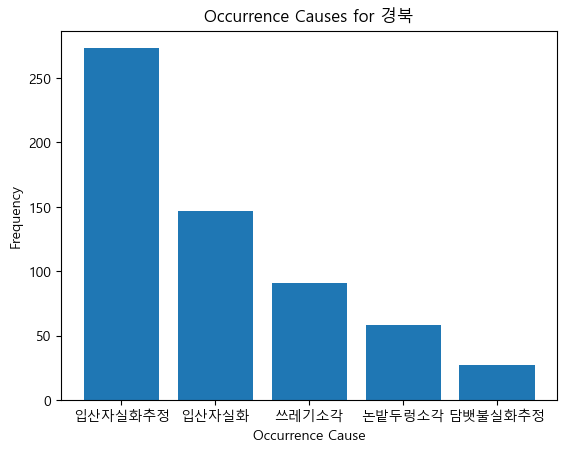

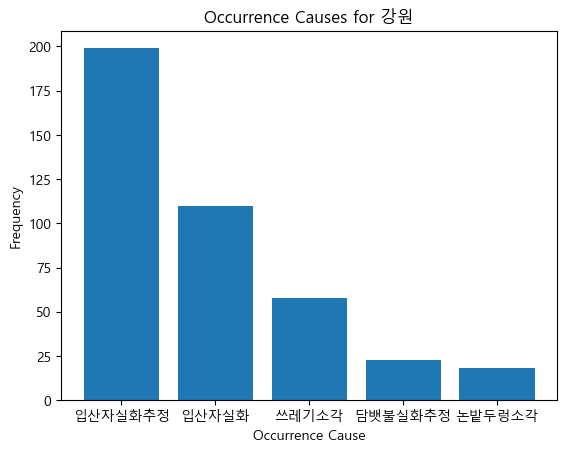

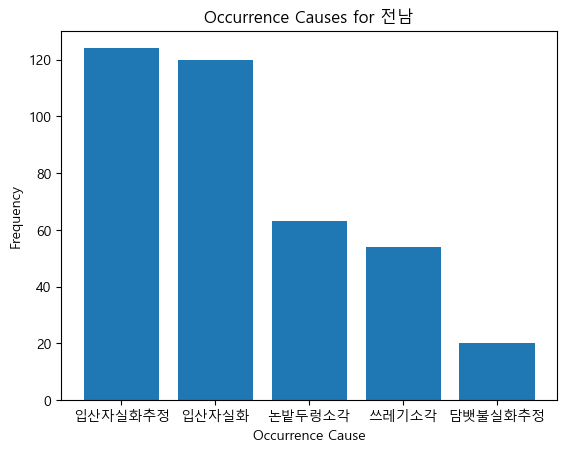

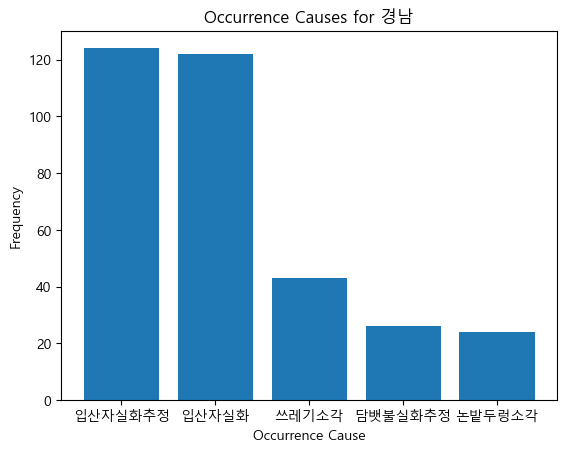

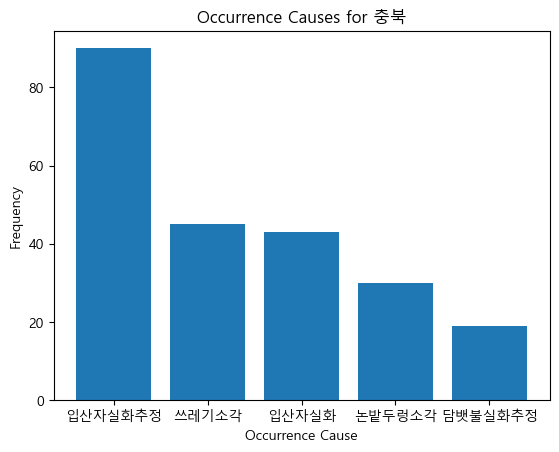

In [71]:
from collections import Counter

occurcause_counter = Counter([data[4] for data in datas])
location_counter = Counter([data[1] for data in datas])

top_occurrence_causes = [occurcause for occurcause, count in occurcause_counter.most_common(5)]
top_locations = [location for location, count in location_counter.most_common(5)]

top_data = [data for data in datas if data[4] in top_occurrence_causes and data[1] in top_locations]

cause_frequency_by_location = {}
for location in top_locations:
    cause_frequency_by_location[location] = Counter([data[4] for data in top_data if data[1] == location])

for location in top_locations:

    top_causes_for_location = [cause for cause, count in cause_frequency_by_location[location].most_common(5)]
    cause_counts = [cause_frequency_by_location[location][cause] for cause in top_causes_for_location]


    fig, ax = plt.subplots()
    ax.bar(top_causes_for_location, cause_counts)

    ax.set_xlabel('Occurrence Cause')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Occurrence Causes for {location}')

    plt.show()


## 월별 산불 발생 횟수

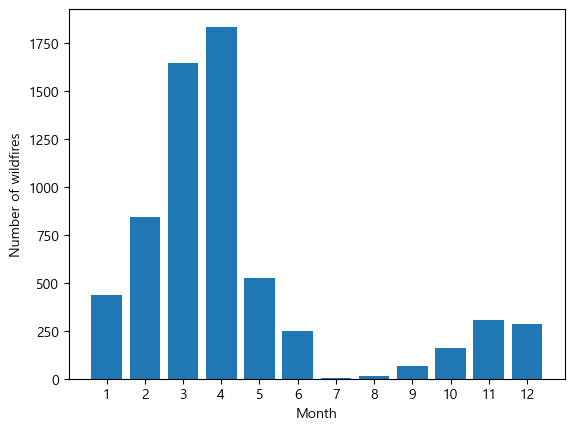

In [72]:

df = pd.DataFrame(datas, columns=['ocurdt', 'ocurdo', 'ocursgg', 'ocuremd', 'ocurcause', 'dmgarea',
                                  'riskavg', 'riskmax', 'tempavg', 'humidcurr', 'humidrel', 'humidmin',
                                  'windmax', 'windavg', 'diravg', 'raindays'])

df['ocurdt'] = pd.to_datetime(df['ocurdt'])
df['month'] = df['ocurdt'].dt.month


monthly_counts = df['month'].value_counts().sort_index()


plt.bar(monthly_counts.index, monthly_counts.values)
plt.xticks(range(1, 13))
plt.xlabel('Month')
plt.ylabel('Number of wildfires')
plt.show()


## 계절별 산불 발생 횟수

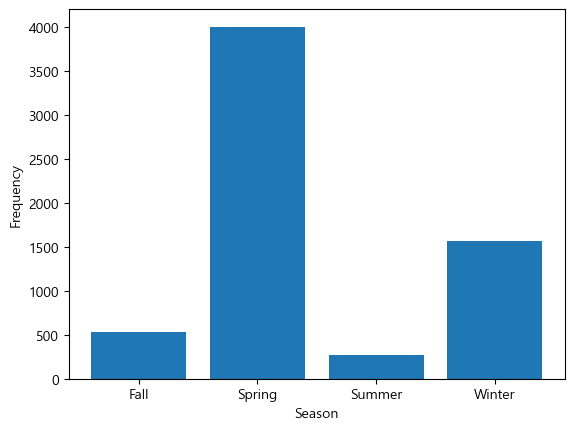

In [73]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df = pd.DataFrame(datas, columns=['ocurdt', 'ocurdo', 'ocursgg', 'ocuremd', 'ocurcause', 'dmgarea', 'riskavg',
                                  'riskmax', 'tempavg', 'humidcurr', 'humidrel', 'humidmin', 'windmax',
                                  'windavg', 'diravg', 'raindays'])

df['month'] = df['ocurdt'].apply(lambda x: int(x[4:6]))
df['season'] = df['month'].apply(get_season)

freq_table = df['season'].value_counts()

freq_table = freq_table.sort_index()

plt.bar(freq_table.index, freq_table.values)
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.show()


## 산불 위험지수(평균)과 평균풍속, 실효습도와의 관계

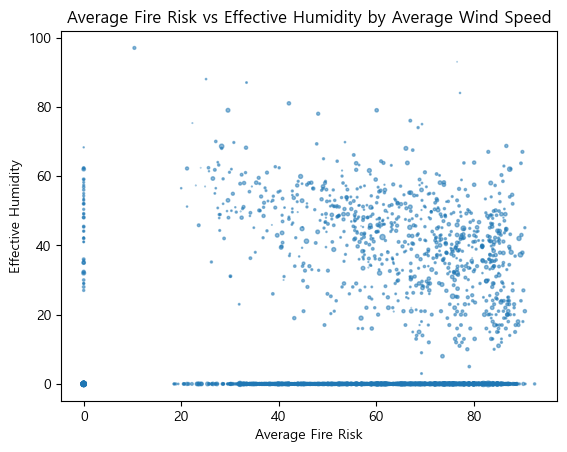

In [74]:
df = pd.DataFrame(datas, columns=['ocurdt', 'ocurdo', 'ocursgg', 'ocuremd', 'ocurcause', 'dmgarea', 'riskavg',
                                  'riskmax', 'tempavg', 'humidcurr', 'humidrel', 'humidmin', 'windmax',
                                  'windavg', 'diravg', 'raindays'])

df['riskavg'] = pd.to_numeric(df['riskavg'], errors='coerce')
df['humidcurr'] = pd.to_numeric(df['humidcurr'], errors='coerce')
df['windavg'] = pd.to_numeric(df['windavg'], errors='coerce')

plt.scatter(df['riskavg'], df['humidcurr'], s=df['windavg'], alpha=0.5)
plt.xlabel('Average Fire Risk')
plt.ylabel('Effective Humidity')
plt.title('Average Fire Risk vs Effective Humidity by Average Wind Speed')
plt.show()


## 첫번째 실효습도와 평균 풍속과의 관계 , 두번째 실효습도와, 산불위험지수(평균)과 관계, 세번째 평균 풍속과, 산불위험지수(평균)과의 관계

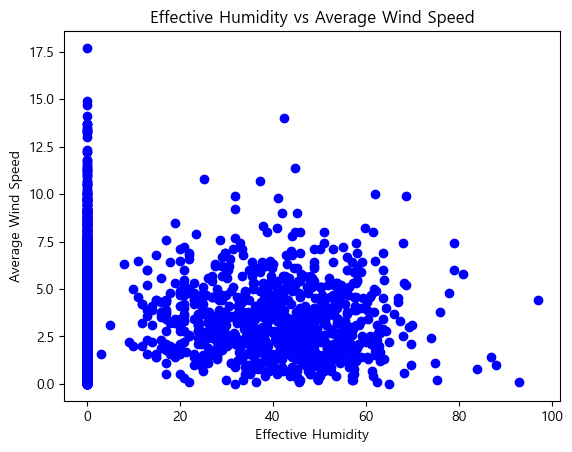

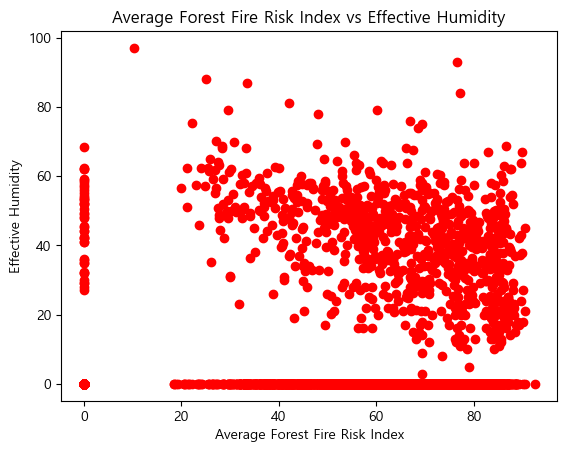

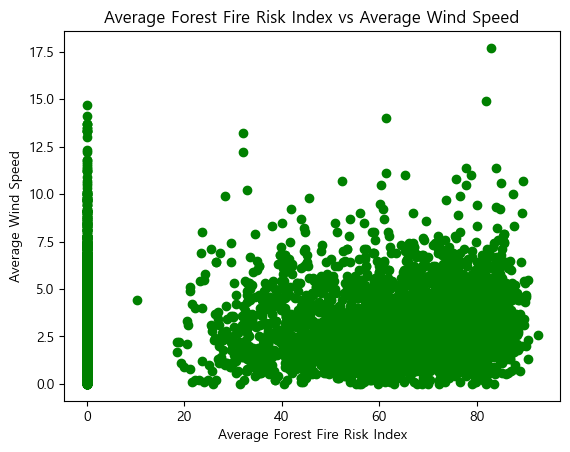

In [75]:
riskavg_list = [float(data[6]) for data in datas]
humidcurr_list = [float(data[9]) for data in datas]
windavg_list = [float(data[13]) for data in datas]

fig, ax = plt.subplots()
ax.scatter(humidcurr_list, windavg_list, color='blue')
ax.set_xlabel('Effective Humidity')
ax.set_ylabel('Average Wind Speed')
ax.set_title('Effective Humidity vs Average Wind Speed')
plt.show()


fig, ax = plt.subplots()
ax.scatter(riskavg_list, humidcurr_list, color='red')
ax.set_xlabel('Average Forest Fire Risk Index')
ax.set_ylabel('Effective Humidity')
ax.set_title('Average Forest Fire Risk Index vs Effective Humidity')
plt.show()


fig, ax = plt.subplots()
ax.scatter(riskavg_list, windavg_list, color='green')
ax.set_xlabel('Average Forest Fire Risk Index')
ax.set_ylabel('Average Wind Speed')
ax.set_title('Average Forest Fire Risk Index vs Average Wind Speed')
plt.show()


In [76]:

windmax_data = [float(data[12]) for data in datas]
riskavg_data = [float(data[6]) for data in datas]


#  평균 풍속과 피해면적과의 관게를 회귀선을 그어 보았는데 어느 정도 상관관계가 있음. 

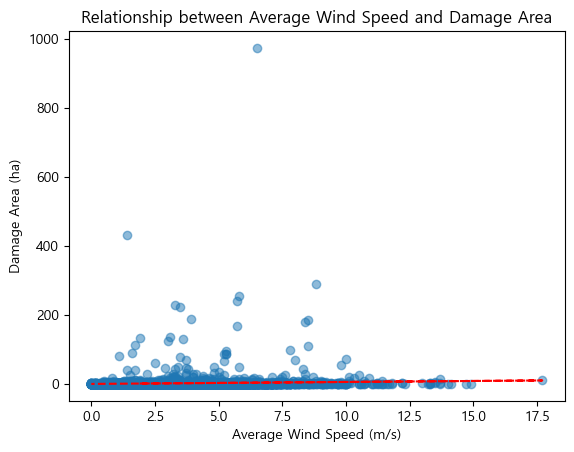

Correlation coefficient between Average Wind Speed and Damage Area: 0.066


In [77]:
import matplotlib.pyplot as plt
import numpy as np


dmgarea_data = [float(data[5]) for data in datas]
windavg_data = [float(data[13]) for data in datas]


fig, ax = plt.subplots()
ax.scatter(windavg_data, dmgarea_data, alpha=0.5)
plt.title('Relationship between Average Wind Speed and Damage Area')
plt.xlabel('Average Wind Speed (m/s)')
plt.ylabel('Damage Area (ha)')


z = np.polyfit(windavg_data, dmgarea_data, 1)
p = np.poly1d(z)
plt.plot(windavg_data,p(windavg_data),"r--")

plt.show()


corr_coef = np.corrcoef(windavg_data, dmgarea_data)[0][1]
print(f"Correlation coefficient between Average Wind Speed and Damage Area: {corr_coef:.3f}")



In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

file_path = r'C:\Users\aaa\Desktop\lats project\강원도 산불 현황 데이터 전처리\강원도 산불 현황 데이터 전처리\data\강원도 산불\강원도 산불 데이터 정보, 사이트.txt'
data = pd.read_csv(file_path, sep='\t', encoding='utf-8')
data = data.transpose()
data.columns = ['인덱스 정보']

columns_dic = {}
data['인덱스 정보'].to_list()

for k, column in enumerate(data.index.to_list()) :
    columns_dic[column] = data['인덱스 정보'][k]

columns_dic

import pandas as pd

file_path = r'C:\Users\aaa\Desktop\lats project\강원도 산불 현황 데이터 전처리\강원도 산불 현황 데이터 전처리\data\강원도 산불\강원도 산불 현황 11_21년도 데이터.xlsx'
mountin = pd.read_excel(file_path)

len(mountin)

mountin.columns = data['인덱스 정보'].to_list()


mountin.isnull().sum

mountin['화재발생일자'] = pd.to_datetime(mountin['화재발생일자'].astype(str))

mountin['발생년도'] = mountin['화재발생일자'].dt.year
mountin['발생월'] = mountin['화재발생일자'].dt.month
mountin['발생일'] = mountin['화재발생일자'].dt.day

mountin.drop('화재발생일자', axis=1, inplace=True)

mountin_damage_dataset = mountin[['발생년도','발생월','발생일', '화재발생시간','사망자수', '부상자수', '인명피해수', '재산피해금액']]
mountin_time_dataset = mountin[['발생년도','발생월','발생일',  '화재발생시간', '접수일자', '접수시각', '출동일자', '출동시각', '현장도착일자', '현장도착시각',
                            '초진일자', '초진시각', '완진일자', '완진시간', '출동소요시간']]
mountin_area_dataset = mountin[['발생년도','발생월','발생일',  '화재발생시간', '시도명', '시군구명', '읍면동명']]
mountin_weather_dataset = mountin[['발생년도','발생월','발생일',  '화재발생시간', '날씨', '온도', '습도', '시간단위풍속']]
mountin_cause_dataset = mountin[['발생년도','발생월','발생일',  '화재발생시간', '발화원인', '발화요인소분류명', '발화요인대분류명']]

mountin_weather_dataset.isnull().sum()

mountin_weather_dataset['시간단위풍속'].describe()
mountin_weather_dataset['시간단위풍속'].fillna('186.797583', inplace=True)

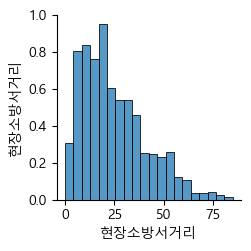

In [79]:
import seaborn as sns


visualization_data = mountin[['현장소방서거리']]


sns.pairplot(visualization_data)


In [80]:
!pip install folium

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

file_path = r'C:\Users\aaa\Desktop\lats project\강원도 산불 현황 데이터 전처리\강원도 산불 현황 데이터 전처리\data\강원도 산불\강원도 산불 데이터 정보, 사이트.txt'
data = pd.read_csv(file_path, sep='\t', encoding='utf-8')
data = data.transpose()
data.columns = ['인덱스 정보']

columns_dic = {}
data['인덱스 정보'].to_list()

for k, column in enumerate(data.index.to_list()) :
    columns_dic[column] = data['인덱스 정보'][k]

columns_dic

import pandas as pd

file_path = r'C:\Users\aaa\Desktop\lats project\강원도 산불 현황 데이터 전처리\강원도 산불 현황 데이터 전처리\data\강원도 산불\강원도 산불 현황 11_21년도 데이터.xlsx'
mountin = pd.read_excel(file_path)

len(mountin)

mountin.columns = data['인덱스 정보'].to_list()
mountin.drop(['일련번호', '조사서번호', '상급기관명', '소방서명', '서센터명', '소방지역대명', '귀소일자','위치정보X', '위치정보Y',
              '귀소시각', '화재진압시간', '현장소방서거리', '현장안전센터거리', '현장소방지역대거리', '도로명','동원일반직수',
              '시설장소대분류명','시설장소중분류명','시설장소소분류명', '화재유형명', '발화지점', '발화열원명', '발생원인','번지',
              '발화열원소분류명', '최초착화물대분류명', '최초착화물소분류명', '연소확대물대분류명', '연소확대물소분류명','읍면동구분명',
              '전체인력수합계', '동원소방력수', '동원의용소방력수', '동원경찰수', '동원군인수', '동원전기가스유관기관수','시간단위풍향',
              '기타동원명수', '동원장비수', '특보내용'], axis=1, inplace=True)

mountin.isnull().sum()

mountin['화재발생일자'] = pd.to_datetime(mountin['화재발생일자'].astype(str))


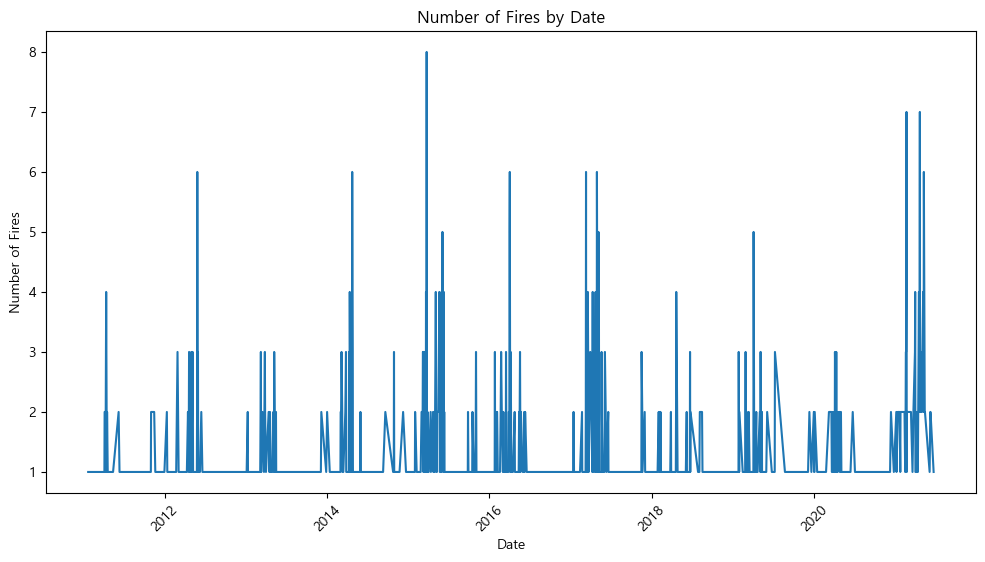

In [82]:
import matplotlib.pyplot as plt


fires_by_date = mountin['화재발생일자'].value_counts().sort_index()


fig, ax = plt.subplots(figsize=(12,6))
ax.plot(fires_by_date.index, fires_by_date.values)


ax.set_xlabel('Date')
ax.set_ylabel('Number of Fires')
ax.set_title('Number of Fires by Date')


plt.xticks(rotation=45)


plt.show()


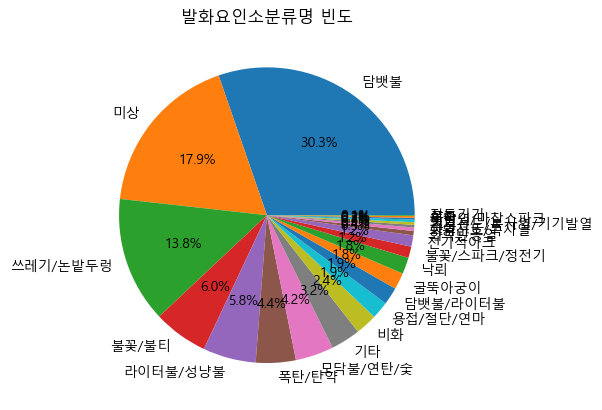

In [83]:
import matplotlib.pyplot as plt


factor_counts = mountin['발화요인소분류명'].value_counts()


fig, ax = plt.subplots()
ax.pie(factor_counts, labels=factor_counts.index, autopct='%1.1f%%')
ax.set_title('발화요인소분류명 빈도')
plt.show()


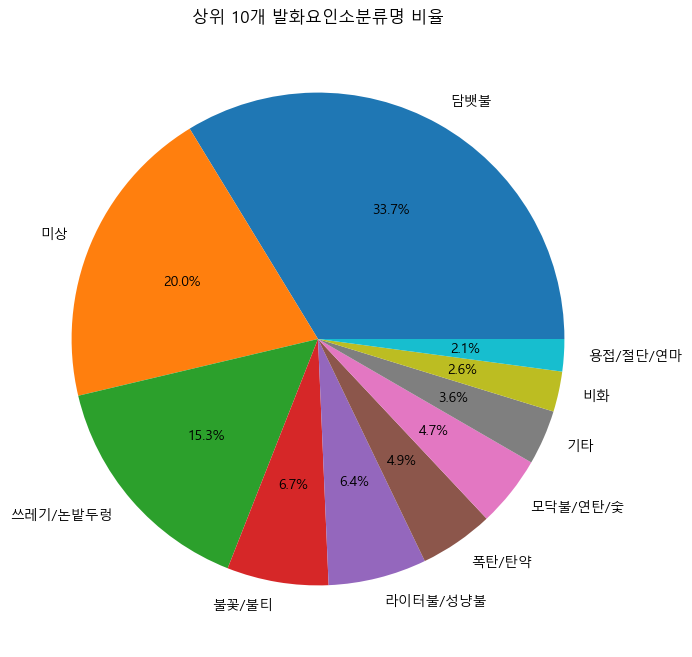

In [84]:
import matplotlib.pyplot as plt


factor_counts = mountin['발화요인소분류명'].value_counts()


top10_factors = factor_counts[:10]


plt.figure(figsize=(8,8))
plt.pie(top10_factors, labels=top10_factors.index, autopct='%.1f%%')
plt.title('상위 10개 발화요인소분류명 비율')
plt.show()


In [85]:
mountin

,사망자수,부상자수,인명피해수,재산피해금액,화재발생일자,화재발생시간,접수일자,접수시각,출동일자,출동시각,...,시도명,시군구명,읍면동명,발화원인,발화요인소분류명,발화요인대분류명,날씨,온도,습도,시간단위풍속
0,0,0,0,330,2021-01-05,120939,20210105,120900,20210105,121151,...,강원도,강릉시,연곡면,기타,모닥불/연탄/숯,부주의,맑음,1.0,16,315.0
1,0,0,0,0,2021-01-12,114416,20210112,114400,20210112,114720,...,강원도,홍천군,동면,입산자실화,미상,미상,맑음,-7.0,59,270.0
2,0,0,0,0,2021-01-15,153938,20210116,153900,20210115,154538,...,강원도,인제군,인제읍,기타,낙뢰,자연적인요인,비,-2.0,69,315.0
3,0,0,0,0,2021-01-17,153649,20210117,153600,20210117,153807,...,강원도,동해시,부곡동,담뱃불,담뱃불,부주의,맑음,0.0,17,315.0
4,0,0,0,0,2021-01-20,144657,20210120,144600,20210120,144852,...,강원도,횡성군,공근면,입산자실화,미상,미상,맑음,6.0,31,225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,0,0,0,0,2011-12-14,141800,20111214,141819,20111214,141940,...,강원도,춘천시,남산면,기타,굴뚝아궁이,부주의,흐림,2.0,61,45.0
1049,0,0,0,0,2011-12-24,230600,20111224,230621,20111224,230625,...,강원도,속초시,영랑동,입산자실화,폭죽,부주의,맑음,-6.0,27,225.0
1050,0,0,0,0,2011-12-27,140900,20111227,140950,20111227,140955,...,강원도,고성군,간성읍,군경사격장,폭탄/탄약,화학적요인,맑음,0.0,0,0.0
1051,0,0,0,4209,2011-12-28,20200,20111228,20231,20111228,20611,...,강원도,홍천군,홍천읍,입산자실화,기타,부주의,맑음,-10.0,73,45.0


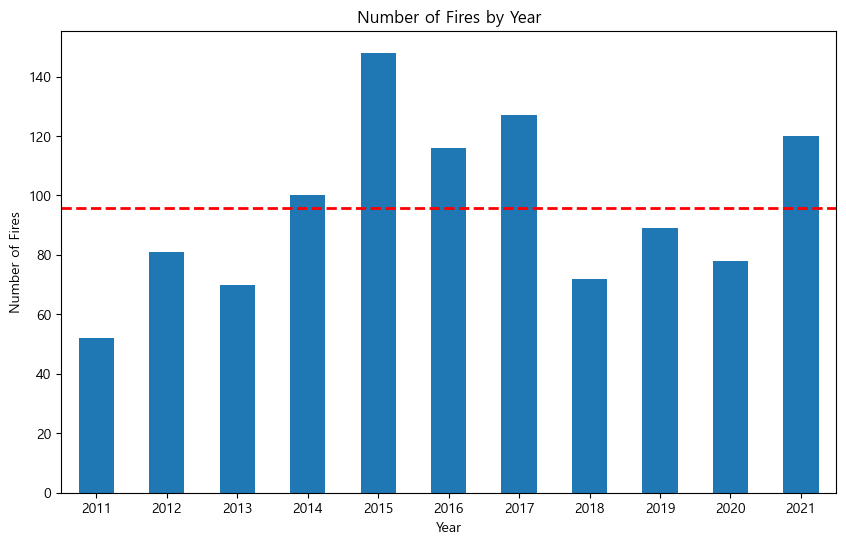

In [86]:
mean_by_year = mountin.groupby(mountin['화재발생일자'].dt.year)['화재발생일자'].count().mean()


yearly_counts = mountin.groupby(mountin['화재발생일자'].dt.year)['화재발생일자'].count()
yearly_counts.plot(kind='bar', figsize=(10, 6))
plt.axhline(mean_by_year, color='red', linestyle='dashed', linewidth=2)
plt.title('Number of Fires by Year')
plt.xlabel('Year')
plt.ylabel('Number of Fires')

plt.xticks(rotation=0)

plt.show()


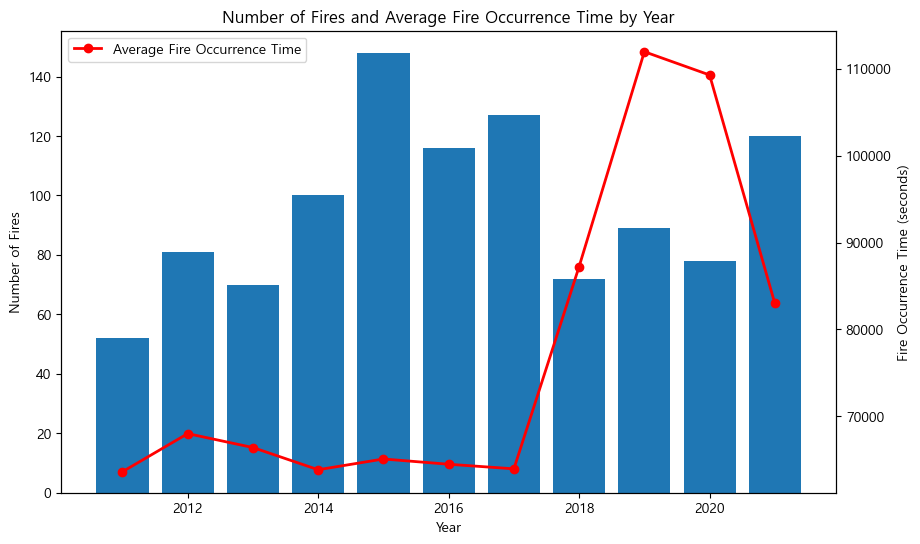

In [87]:

mean_by_year = mountin.groupby(mountin['화재발생일자'].dt.year)['화재발생일자'].count().mean()


mean_time = mountin.groupby(mountin['화재발생일자'].dt.year)['화재발생시간'].apply(lambda x: (x.astype(str).str[:2].astype(int)*3600 + x.astype(str).str[2:4].astype(int)*60 + x.astype(str).str[4:].astype(int)).mean())


yearly_counts = mountin.groupby(mountin['화재발생일자'].dt.year)['화재발생일자'].count()
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(yearly_counts.index, yearly_counts.values)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Fires')


plt.xticks(rotation=0)


ax2 = ax1.twinx()
ax2.plot(mean_time.index, mean_time.values, color='red', marker='o', linewidth=2, label='Average Fire Occurrence Time')
ax2.set_ylabel('Fire Occurrence Time (seconds)')
ax2.legend(loc='upper left')

# 제목 추가
plt.title('Number of Fires and Average Fire Occurrence Time by Year')

plt.show()


Text(0.5, 1.0, 'Number of Fires and')

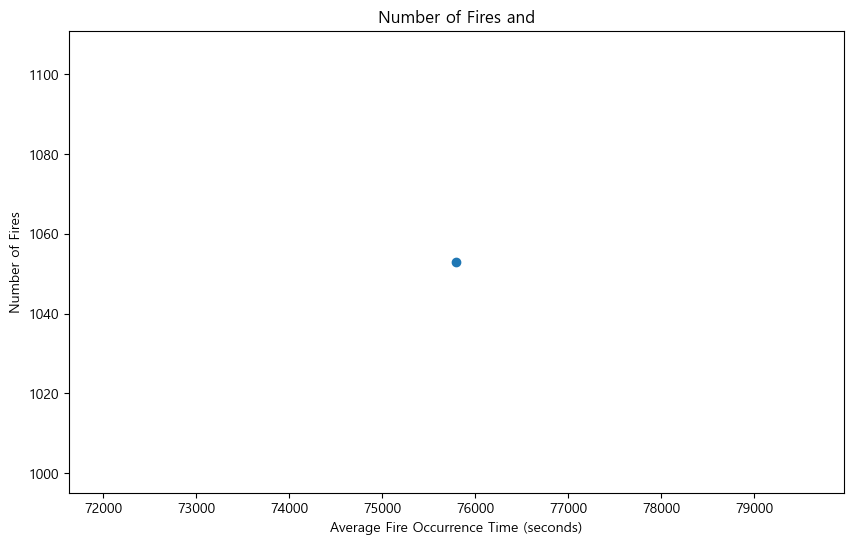

In [88]:

conditions = [
    (mountin['화재발생시간'] >= 600) & (mountin['화재발생시간'] < 1200),
    (mountin['화재발생시간'] >= 1200) & (mountin['화재발생시간'] < 1800),
    (mountin['화재발생시간'] >= 1800) & (mountin['화재발생시간'] < 2400),
    (mountin['화재발생시간'] >= 0) & (mountin['화재발생시간'] < 600)
]
choices = ['Morning', 'Afternoon', 'Evening', 'Night']
mountin['time_of_day'] = np.select(conditions, choices)


counts_by_time = mountin.groupby('time_of_day')['화재발생일자'].count()
mean_time_by_time = mountin.groupby('time_of_day')['화재발생시간'].apply(
    lambda x: (x.astype(str).str[:2].astype(int)*3600 + x.astype(str).str[2:4].astype(int)*60 + x.astype(str).str[4:].astype(int)).mean()
)


fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(mean_time_by_time, counts_by_time)
ax.set_xlabel('Average Fire Occurrence Time (seconds)')
ax.set_ylabel('Number of Fires')
ax.set_title('Number of Fires and')


In [89]:
mountin

,사망자수,부상자수,인명피해수,재산피해금액,화재발생일자,화재발생시간,접수일자,접수시각,출동일자,출동시각,...,시군구명,읍면동명,발화원인,발화요인소분류명,발화요인대분류명,날씨,온도,습도,시간단위풍속,time_of_day
0,0,0,0,330,2021-01-05,120939,20210105,120900,20210105,121151,...,강릉시,연곡면,기타,모닥불/연탄/숯,부주의,맑음,1.0,16,315.0,0
1,0,0,0,0,2021-01-12,114416,20210112,114400,20210112,114720,...,홍천군,동면,입산자실화,미상,미상,맑음,-7.0,59,270.0,0
2,0,0,0,0,2021-01-15,153938,20210116,153900,20210115,154538,...,인제군,인제읍,기타,낙뢰,자연적인요인,비,-2.0,69,315.0,0
3,0,0,0,0,2021-01-17,153649,20210117,153600,20210117,153807,...,동해시,부곡동,담뱃불,담뱃불,부주의,맑음,0.0,17,315.0,0
4,0,0,0,0,2021-01-20,144657,20210120,144600,20210120,144852,...,횡성군,공근면,입산자실화,미상,미상,맑음,6.0,31,225.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,0,0,0,0,2011-12-14,141800,20111214,141819,20111214,141940,...,춘천시,남산면,기타,굴뚝아궁이,부주의,흐림,2.0,61,45.0,0
1049,0,0,0,0,2011-12-24,230600,20111224,230621,20111224,230625,...,속초시,영랑동,입산자실화,폭죽,부주의,맑음,-6.0,27,225.0,0
1050,0,0,0,0,2011-12-27,140900,20111227,140950,20111227,140955,...,고성군,간성읍,군경사격장,폭탄/탄약,화학적요인,맑음,0.0,0,0.0,0
1051,0,0,0,4209,2011-12-28,20200,20111228,20231,20111228,20611,...,홍천군,홍천읍,입산자실화,기타,부주의,맑음,-10.0,73,45.0,0


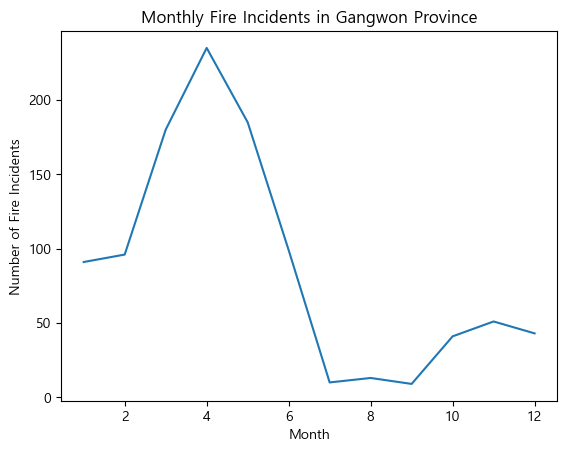

In [90]:
# 월별 화재발생 건수 계산
monthly_counts = mountin.groupby(mountin['화재발생일자'].dt.month)['화재발생일자'].count()

# 시각화
plt.plot(monthly_counts.index, monthly_counts.values)
plt.xlabel('Month')
plt.ylabel('Number of Fire Incidents')
plt.title('Monthly Fire Incidents in Gangwon Province')
plt.show()


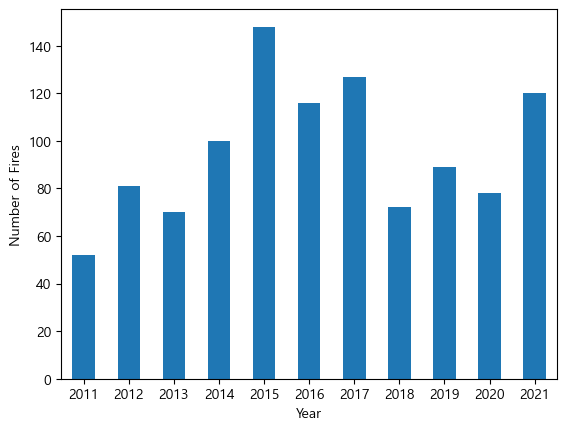

In [91]:
import matplotlib.pyplot as plt

# 화재발생일자를 년도로 추출
mountin['year'] = mountin['화재발생일자'].dt.year

# 년도별 화재발생 건수 계산
yearly_counts = mountin.groupby('year').size()

# 시각화
yearly_counts.plot(kind='bar', rot=0)
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.show()


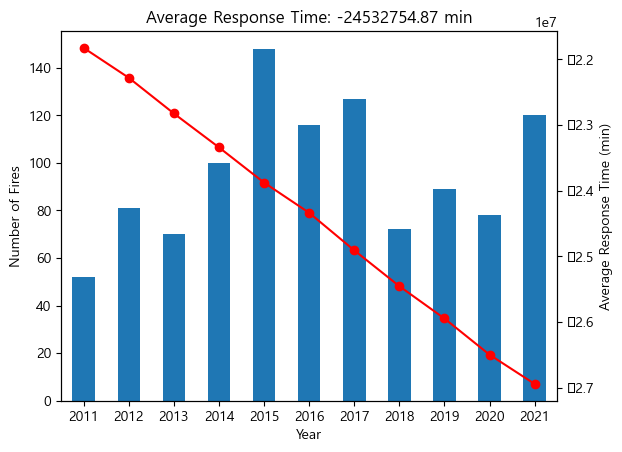

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# 화재발생일자를 년도로 추출
mountin['year'] = mountin['화재발생일자'].dt.year

# 년도별 화재발생 건수 계산
yearly_counts = mountin.groupby('year').size()

# 출동시각과 화재발생일자 컬럼을 datetime 형식으로 변환
mountin['출동시각'] = pd.to_datetime(mountin['출동시각'])
mountin['화재발생일자'] = pd.to_datetime(mountin['화재발생일자'])

# 출동시각과 화재발생일자의 차이를 계산하여 출동시간을 구하고 평균값을 계산
mountin['출동시간'] = (mountin['출동시각'] - mountin['화재발생일자']).dt.total_seconds() / 60
avg_response_time = mountin['출동시간'].mean()

# 시각화
yearly_counts.plot(kind='bar', rot=0)
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.twinx().plot(np.arange(len(yearly_counts)), mountin.groupby('year')['출동시간'].mean(), '-o', color='red')
plt.ylabel('Average Response Time (min)')
plt.title(f'Average Response Time: {avg_response_time:.2f} min')
plt.show()


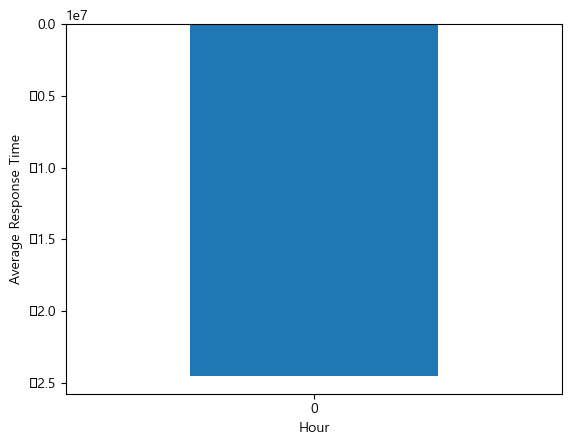

In [93]:

mountin['출동시각'] = pd.to_datetime(mountin['출동시각'])


mountin['hour'] = mountin['출동시각'].dt.hour


hourly_mean_time = mountin.groupby('hour')['출동시간'].mean()


hourly_mean_time.plot(kind='bar', rot=0)
plt.xlabel('Hour')
plt.ylabel('Average Response Time')
plt.show()


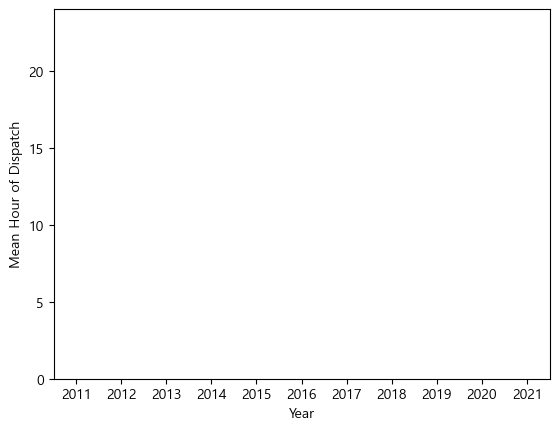

In [94]:

mountin['hour'] = mountin['출동시각'].dt.hour


mean_hour = mountin.groupby('year')['hour'].mean()


mean_hour.plot(kind='bar', rot=0)
plt.xlabel('Year')
plt.ylabel('Mean Hour of Dispatch')
plt.ylim(0, 24)
plt.show()


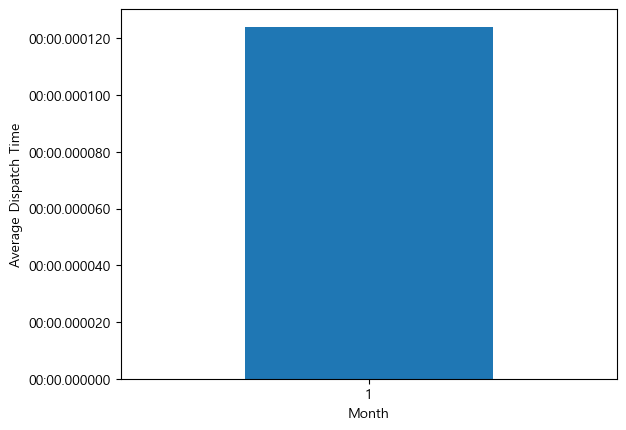

In [95]:

mountin['출동시각'] = pd.to_datetime(mountin['출동시각'], format='%H:%M:%S')


monthly_avg = mountin.groupby(mountin['출동시각'].dt.month)['출동시각'].mean()


monthly_avg.plot(kind='bar', rot=0)
plt.xlabel('Month')
plt.ylabel('Average Dispatch Time')
plt.show()


In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

file_path = r'C:\Users\aaa\Desktop\lats project\강원도 산불 현황 데이터 전처리\강원도 산불 현황 데이터 전처리\data\강원도 산불\강원도 산불 데이터 정보, 사이트.txt'
data = pd.read_csv(file_path, sep='\t', encoding='utf-8')
data = data.transpose()
data.columns = ['인덱스 정보']

columns_dic = {}
data['인덱스 정보'].to_list()

for k, column in enumerate(data.index.to_list()) :
    columns_dic[column] = data['인덱스 정보'][k]

columns_dic

import pandas as pd

file_path = r'C:\Users\aaa\Desktop\lats project\강원도 산불 현황 데이터 전처리\강원도 산불 현황 데이터 전처리\data\강원도 산불\강원도 산불 현황 11_21년도 데이터.xlsx'
mountin = pd.read_excel(file_path)

len(mountin)

mountin.columns = data['인덱스 정보'].to_list()
mountin.drop(['일련번호', '조사서번호', '상급기관명', '소방서명', '서센터명', '소방지역대명', '귀소일자','위치정보X', '위치정보Y',
              '귀소시각', '화재진압시간', '현장소방서거리', '현장안전센터거리', '현장소방지역대거리', '도로명','동원일반직수',
              '시설장소대분류명','시설장소중분류명','시설장소소분류명', '화재유형명', '발화지점', '발화열원명', '발생원인','번지',
              '발화열원소분류명', '최초착화물대분류명', '최초착화물소분류명', '연소확대물대분류명', '연소확대물소분류명','읍면동구분명',
              '전체인력수합계', '동원소방력수', '동원의용소방력수', '동원경찰수', '동원군인수', '동원전기가스유관기관수','시간단위풍향',
              '기타동원명수', '동원장비수', '특보내용'], axis=1, inplace=True)

mountin.isnull().sum()

mountin['화재발생일자'] = pd.to_datetime(mountin['화재발생일자'].astype(str))
mountin['출동시각'] = pd.to_datetime(mountin['출동시각'].astype(str), format='%H%M%S').dt.time
mountin['화재발생시간'] = pd.to_datetime(mountin['화재발생시간'].astype(str), format='%H%M%S').dt.time
mountin['접수시각'] = pd.to_datetime(mountin['접수시각'].astype(str), format='%H%M%S').dt.time


In [97]:
mountin

,사망자수,부상자수,인명피해수,재산피해금액,화재발생일자,화재발생시간,접수일자,접수시각,출동일자,출동시각,...,시도명,시군구명,읍면동명,발화원인,발화요인소분류명,발화요인대분류명,날씨,온도,습도,시간단위풍속
0,0,0,0,330,2021-01-05,12:09:39,20210105,12:09:00,20210105,12:11:51,...,강원도,강릉시,연곡면,기타,모닥불/연탄/숯,부주의,맑음,1.0,16,315.0
1,0,0,0,0,2021-01-12,11:44:16,20210112,11:44:00,20210112,11:47:20,...,강원도,홍천군,동면,입산자실화,미상,미상,맑음,-7.0,59,270.0
2,0,0,0,0,2021-01-15,15:39:38,20210116,15:39:00,20210115,15:45:38,...,강원도,인제군,인제읍,기타,낙뢰,자연적인요인,비,-2.0,69,315.0
3,0,0,0,0,2021-01-17,15:36:49,20210117,15:36:00,20210117,15:38:07,...,강원도,동해시,부곡동,담뱃불,담뱃불,부주의,맑음,0.0,17,315.0
4,0,0,0,0,2021-01-20,14:46:57,20210120,14:46:00,20210120,14:48:52,...,강원도,횡성군,공근면,입산자실화,미상,미상,맑음,6.0,31,225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,0,0,0,0,2011-12-14,14:18:00,20111214,14:18:19,20111214,14:19:40,...,강원도,춘천시,남산면,기타,굴뚝아궁이,부주의,흐림,2.0,61,45.0
1049,0,0,0,0,2011-12-24,23:06:00,20111224,23:06:21,20111224,23:06:25,...,강원도,속초시,영랑동,입산자실화,폭죽,부주의,맑음,-6.0,27,225.0
1050,0,0,0,0,2011-12-27,14:09:00,20111227,14:09:50,20111227,14:09:55,...,강원도,고성군,간성읍,군경사격장,폭탄/탄약,화학적요인,맑음,0.0,0,0.0
1051,0,0,0,4209,2011-12-28,20:20:00,20111228,20:23:01,20111228,20:06:11,...,강원도,홍천군,홍천읍,입산자실화,기타,부주의,맑음,-10.0,73,45.0


In [98]:
import datetime


def get_time_diff(row):
    time_format = '%H:%M:%S'

    received_time = datetime.datetime.strptime(str(row['접수시각']), time_format)
    fire_time = datetime.datetime.strptime(str(row['화재발생시간']), time_format)

    time_diff = fire_time - received_time

    return time_diff.seconds // 60


mountin['접수-발생 차이(분)'] = mountin.apply(get_time_diff, axis=1)


In [99]:
mountin

,사망자수,부상자수,인명피해수,재산피해금액,화재발생일자,화재발생시간,접수일자,접수시각,출동일자,출동시각,...,시군구명,읍면동명,발화원인,발화요인소분류명,발화요인대분류명,날씨,온도,습도,시간단위풍속,접수-발생 차이(분)
0,0,0,0,330,2021-01-05,12:09:39,20210105,12:09:00,20210105,12:11:51,...,강릉시,연곡면,기타,모닥불/연탄/숯,부주의,맑음,1.0,16,315.0,0
1,0,0,0,0,2021-01-12,11:44:16,20210112,11:44:00,20210112,11:47:20,...,홍천군,동면,입산자실화,미상,미상,맑음,-7.0,59,270.0,0
2,0,0,0,0,2021-01-15,15:39:38,20210116,15:39:00,20210115,15:45:38,...,인제군,인제읍,기타,낙뢰,자연적인요인,비,-2.0,69,315.0,0
3,0,0,0,0,2021-01-17,15:36:49,20210117,15:36:00,20210117,15:38:07,...,동해시,부곡동,담뱃불,담뱃불,부주의,맑음,0.0,17,315.0,0
4,0,0,0,0,2021-01-20,14:46:57,20210120,14:46:00,20210120,14:48:52,...,횡성군,공근면,입산자실화,미상,미상,맑음,6.0,31,225.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,0,0,0,0,2011-12-14,14:18:00,20111214,14:18:19,20111214,14:19:40,...,춘천시,남산면,기타,굴뚝아궁이,부주의,흐림,2.0,61,45.0,1439
1049,0,0,0,0,2011-12-24,23:06:00,20111224,23:06:21,20111224,23:06:25,...,속초시,영랑동,입산자실화,폭죽,부주의,맑음,-6.0,27,225.0,1439
1050,0,0,0,0,2011-12-27,14:09:00,20111227,14:09:50,20111227,14:09:55,...,고성군,간성읍,군경사격장,폭탄/탄약,화학적요인,맑음,0.0,0,0.0,1439
1051,0,0,0,4209,2011-12-28,20:20:00,20111228,20:23:01,20111228,20:06:11,...,홍천군,홍천읍,입산자실화,기타,부주의,맑음,-10.0,73,45.0,1436


In [100]:

mountin['시간차이'] = mountin.apply(lambda row: (pd.to_datetime(str(row['화재발생일자']) + ' ' + str(row['화재발생시간'])) - pd.to_datetime(str(row['화재발생일자']) + ' ' + str(row['접수시각']))).total_seconds(), axis=1)
mountin['시간차이_시'] = mountin['시간차이'] // 3600
mountin['시간차이_분'] = (mountin['시간차이'] % 3600) // 60
mountin['시간차이_초'] = mountin['시간차이'] % 60


print(mountin[['접수시각', '화재발생시간', '시간차이_시', '시간차이_분', '시간차이_초']].head())


       접수시각    화재발생시간  시간차이_시  시간차이_분  시간차이_초
0  12:09:00  12:09:39     0.0     0.0    39.0
1  11:44:00  11:44:16     0.0     0.0    16.0
2  15:39:00  15:39:38     0.0     0.0    38.0
3  15:36:00  15:36:49     0.0     0.0    49.0
4  14:46:00  14:46:57     0.0     0.0    57.0


In [101]:
mountin

,사망자수,부상자수,인명피해수,재산피해금액,화재발생일자,화재발생시간,접수일자,접수시각,출동일자,출동시각,...,발화요인대분류명,날씨,온도,습도,시간단위풍속,접수-발생 차이(분),시간차이,시간차이_시,시간차이_분,시간차이_초
0,0,0,0,330,2021-01-05,12:09:39,20210105,12:09:00,20210105,12:11:51,...,부주의,맑음,1.0,16,315.0,0,39.0,0.0,0.0,39.0
1,0,0,0,0,2021-01-12,11:44:16,20210112,11:44:00,20210112,11:47:20,...,미상,맑음,-7.0,59,270.0,0,16.0,0.0,0.0,16.0
2,0,0,0,0,2021-01-15,15:39:38,20210116,15:39:00,20210115,15:45:38,...,자연적인요인,비,-2.0,69,315.0,0,38.0,0.0,0.0,38.0
3,0,0,0,0,2021-01-17,15:36:49,20210117,15:36:00,20210117,15:38:07,...,부주의,맑음,0.0,17,315.0,0,49.0,0.0,0.0,49.0
4,0,0,0,0,2021-01-20,14:46:57,20210120,14:46:00,20210120,14:48:52,...,미상,맑음,6.0,31,225.0,0,57.0,0.0,0.0,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,0,0,0,0,2011-12-14,14:18:00,20111214,14:18:19,20111214,14:19:40,...,부주의,흐림,2.0,61,45.0,1439,-19.0,-1.0,59.0,41.0
1049,0,0,0,0,2011-12-24,23:06:00,20111224,23:06:21,20111224,23:06:25,...,부주의,맑음,-6.0,27,225.0,1439,-21.0,-1.0,59.0,39.0
1050,0,0,0,0,2011-12-27,14:09:00,20111227,14:09:50,20111227,14:09:55,...,화학적요인,맑음,0.0,0,0.0,1439,-50.0,-1.0,59.0,10.0
1051,0,0,0,4209,2011-12-28,20:20:00,20111228,20:23:01,20111228,20:06:11,...,부주의,맑음,-10.0,73,45.0,1436,-181.0,-1.0,56.0,59.0


## 화재발생시간과 접수시각 시간 차이

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



file_path = r'C:\Users\aaa\Desktop\lats project\강원도 산불 현황 데이터 전처리\강원도 산불 현황 데이터 전처리\data\강원도 산불\강원도 산불 데이터 정보, 사이트.txt'
data = pd.read_csv(file_path, sep='\t', encoding='utf-8')
data = data.transpose()
data.columns = ['인덱스 정보']

columns_dic = {}
data['인덱스 정보'].to_list()

for k, column in enumerate(data.index.to_list()) :
    columns_dic[column] = data['인덱스 정보'][k]

columns_dic



file_path = r'C:\Users\aaa\Desktop\lats project\강원도 산불 현황 데이터 전처리\강원도 산불 현황 데이터 전처리\data\강원도 산불\강원도 산불 현황 11_21년도 데이터.xlsx'
mountin = pd.read_excel(file_path)

len(mountin)

mountin.columns = data['인덱스 정보'].to_list()
mountin.drop(['일련번호', '조사서번호', '상급기관명', '소방서명', '서센터명', '소방지역대명', '귀소일자','위치정보X', '위치정보Y',
              '귀소시각', '화재진압시간', '현장소방서거리', '현장안전센터거리', '현장소방지역대거리', '도로명','동원일반직수',
              '시설장소대분류명','시설장소중분류명','시설장소소분류명', '화재유형명', '발화지점', '발화열원명', '발생원인','번지',
              '발화열원소분류명', '최초착화물대분류명', '최초착화물소분류명', '연소확대물대분류명', '연소확대물소분류명','읍면동구분명',
              '전체인력수합계', '동원소방력수', '동원의용소방력수', '동원경찰수', '동원군인수', '동원전기가스유관기관수','시간단위풍향',
              '기타동원명수', '동원장비수', '특보내용'], axis=1, inplace=True)

mountin.isnull().sum()

mountin['화재발생일자'] = pd.to_datetime(mountin['화재발생일자'].astype(str))
mountin['출동시각'] = pd.to_datetime(mountin['출동시각'].astype(str), format='%H%M%S').dt.time
mountin['화재발생시간'] = pd.to_datetime(mountin['화재발생시간'].astype(str), format='%H%M%S').dt.time
mountin['접수시각'] = pd.to_datetime(mountin['접수시각'].astype(str), format='%H%M%S').dt.time
mountin['시간차이'] = mountin.apply(lambda row: (pd.to_datetime(str(row['화재발생일자']) + ' ' + str(row['화재발생시간'])) - pd.to_datetime(str(row['화재발생일자']) + ' ' + str(row['접수시각']))).total_seconds(), axis=1)
mountin['시간차이_시'] = mountin['시간차이'] // 3600
mountin['시간차이_분'] = (mountin['시간차이'] % 3600) // 60
mountin['시간차이_초'] = mountin['시간차이'] % 60


import datetime

time_diff = []
for i in range(len(mountin)):
    out_time = datetime.datetime.combine(datetime.date.min, mountin['출동시각'][i])
    in_time = datetime.datetime.combine(datetime.date.min, mountin['접수시각'][i])
    diff = out_time - in_time
    time_diff.append(diff)

mountin['출동접수시간차'] = time_diff


hours = []
minutes = []
seconds = []

for td in mountin['출동접수시간차']:
    total_seconds = td.total_seconds()
    hours.append(int(total_seconds // 3600))
    minutes.append(int(total_seconds % 3600 // 60))
    seconds.append(int(total_seconds % 60))

mountin['출동접수시간차_시'] = hours
mountin['출동접수시간차_분'] = minutes
mountin['출동접수시간차_초'] = seconds


from datetime import datetime, timedelta

time_diff_list = []

for i in range(len(mountin)):
    time_diff = datetime.combine(datetime.today(), mountin['출동시각'][i]) - datetime.combine(datetime.today(), mountin['화재발생시간'][i])
    time_diff_list.append(time_diff)

mountin['출동_발생 시간차'] = time_diff_list
mountin['출동_발생 시간차_시'] = mountin['출동_발생 시간차'].apply(lambda x: x.seconds // 3600)
mountin['출동_발생 시간차_분'] = mountin['출동_발생 시간차'].apply(lambda x: (x.seconds // 60) % 60)
mountin['출동_발생 시간차_초'] = mountin['출동_발생 시간차'].apply(lambda x: x.seconds % 60)



In [160]:
mountin

,사망자수,부상자수,인명피해수,재산피해금액,화재발생일자,화재발생시간,접수일자,접수시각,출동일자,출동시각,...,시간차이_분,시간차이_초,출동접수시간차,출동접수시간차_시,출동접수시간차_분,출동접수시간차_초,출동_발생 시간차,출동_발생 시간차_시,출동_발생 시간차_분,출동_발생 시간차_초
0,0,0,0,330,2021-01-05,12:09:39,20210105,12:09:00,20210105,12:11:51,...,0.0,39.0,0 days 00:02:51,0,2,51,0 days 00:02:12,0,2,12
1,0,0,0,0,2021-01-12,11:44:16,20210112,11:44:00,20210112,11:47:20,...,0.0,16.0,0 days 00:03:20,0,3,20,0 days 00:03:04,0,3,4
2,0,0,0,0,2021-01-15,15:39:38,20210116,15:39:00,20210115,15:45:38,...,0.0,38.0,0 days 00:06:38,0,6,38,0 days 00:06:00,0,6,0
3,0,0,0,0,2021-01-17,15:36:49,20210117,15:36:00,20210117,15:38:07,...,0.0,49.0,0 days 00:02:07,0,2,7,0 days 00:01:18,0,1,18
4,0,0,0,0,2021-01-20,14:46:57,20210120,14:46:00,20210120,14:48:52,...,0.0,57.0,0 days 00:02:52,0,2,52,0 days 00:01:55,0,1,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,0,0,0,0,2011-12-14,14:18:00,20111214,14:18:19,20111214,14:19:40,...,59.0,41.0,0 days 00:01:21,0,1,21,0 days 00:01:40,0,1,40
1049,0,0,0,0,2011-12-24,23:06:00,20111224,23:06:21,20111224,23:06:25,...,59.0,39.0,0 days 00:00:04,0,0,4,0 days 00:00:25,0,0,25
1050,0,0,0,0,2011-12-27,14:09:00,20111227,14:09:50,20111227,14:09:55,...,59.0,10.0,0 days 00:00:05,0,0,5,0 days 00:00:55,0,0,55
1051,0,0,0,4209,2011-12-28,20:20:00,20111228,20:23:01,20111228,20:06:11,...,56.0,59.0,-1 days +23:43:10,-1,43,10,-1 days +23:46:11,23,46,11


## 화재발상시간과 접수시간 차이 평균

In [142]:
mean_sec = mountin['시간차이_초'].mean()
print(mean_sec)


29.085470085470085


In [150]:
mean_sec = mountin['출동접수시간차'].mean()
print(mean_sec)


0 days 00:00:05.636277302


In [158]:
mean_sec = mountin['출동_발생 시간차'].mean()
print(mean_sec)

-1 days +23:59:52.220322887
